# CAP 2751 - Tools for Data Science
***Include the following info by clicking here:***
* Name: Jasmin Spanioli
* Canvas Course Section: CAP2751-1
* Date: 6/22/25
* Link to your Notebook: https://colab.research.google.com/drive/1mzGWqlmZH9FL1ZYU4hwRyOkAr-usFKZ9?usp=sharing


----
## Assignment 2: Exploratory Data Analysis (EDA) and Data Visualization
----

## STARTER






### Goals

- To improve your understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have additional experience of manipulating, summarizing, and visualizing small datasets.
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured in three parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!**
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc.

---------
## Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

-------------------
## Part 1: The MovieLens 1M dataset (40 pts + 8 bonus pts)

This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms.

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline # show graphs when made
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

import requests, io             # internet and input tools
import zipfile as zf            # zip file tools
import sys                      # system module, used to get Python version
import datetime as dt           # date tools, used to note current date

print('\nPython version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())


Python version:  3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Pandas version:  2.2.2
Requests version:  2.32.3
Today's date: 2025-06-22


In [ ]:
url = 'https://github.com/PBSC-Hammond/CAP2751/raw/main/users.dat'
unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] # create column names for users
users = pd.read_table(url, sep='::', header=None, names=unames, engine='python') # create table

# Corrected URL for ratings.dat
url = 'https://github.com/PBSC-Hammond/CAP2751/raw/main/ratings.dat'
rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] # create column names for ratings
ratings = pd.read_table(url, sep='::', header=None, names=rnames, engine='python') # create table

url = 'https://github.com/PBSC-Hammond/CAP2751/raw/main/movies.dat'
mnames = ['movie_id', 'title', 'genres'] # create column names for movies
movies = pd.read_table(url, sep='::', header=None, encoding='latin-1', names=mnames, engine='python') # create table

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
ratings.mean()

,0
user_id,3.024512e+03
movie_id,1.865540e+03
rating,3.581564e+00
timestamp,9.722437e+08


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Based on the README file:
- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

Note to self: check to see if this will have an impact.

### 1.1 - Your turn! (16 points, i.e., 4 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
1. How many users are stored in the _users_ table and what information is stored for each user?
2. How many movies are stored in the _movies_ table and what information is stored for each movie?
3. How many ratings are stored in the _ratings_ table and what information is stored for each rating?
4. How are users, the movies each user has rated, and the rating related?

*Note*: ages and occupations are coded as integers indicating _groups_ described in the dataset’s [README](https://github.com/ogemarques/data-files/blob/main/README) file.

### Solution

(ENTER YOUR ANSWERS HERE)

In [ ]:
# How many users are stored in the users table and what information is stored for each user?
print(f"There are {users.shape[0]} users. Each user has {list(users.columns)}")
# How many movies are stored in the movies table and what information is stored for each movie?
print(f"There are {movies.shape[0]} movies. Each movie has {list(movies.columns)}")
# How many ratings are stored in the ratings table and what information is stored for each rating?
print(f"There are {ratings.shape[0]} ratings. Each rating has {list(ratings.columns)}")
# How are users, the movies each user has rated, and the rating related?
print("The 'user_id' in the ratings table links to the users table, and 'movie_id' links to the movies table.")
print("This allows us to see which user rated which movie and what score they gave it.")

There are 6040 users. Each user has ['user_id', 'gender', 'age', 'occupation', 'zip']
There are 3883 movies. Each movie has ['movie_id', 'title', 'genres']
There are 1000209 ratings. Each rating has ['user_id', 'movie_id', 'rating', 'timestamp']
The 'user_id' in the ratings table links to the users table, and 'movie_id' links to the movies table.
This allows us to see which user rated which movie and what score they gave it.


### 1.2 - Your turn! (16 points, i.e., 4 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
5. What is the occupation that maps to most of the users? Plot a histogram of the occupation counts and report the size of the largest bin.
6. What percentage of users are 50 years old or older? Plot a bar graph showing all percentages (per age group) and report the requested value.
7. Which movie received the highest number of ratings (and how were such ratings distributed)?
8. What is the average rating for all movies/users?

### Solution

(ENTER YOUR ANSWERS HERE)

Occupation 4 has the most users: 759


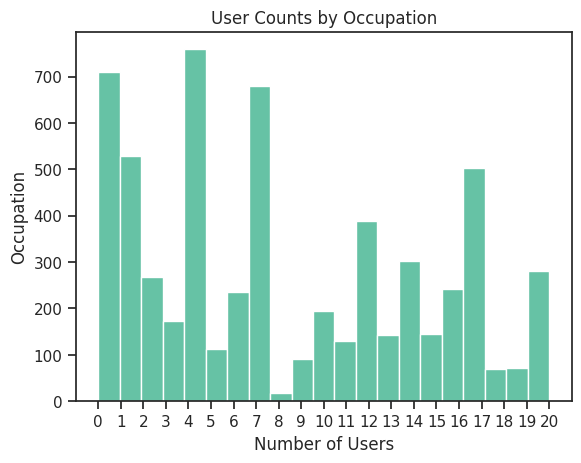

The largest bin size is 759 users.

Percentage of users aged 50 or older: 14.50%


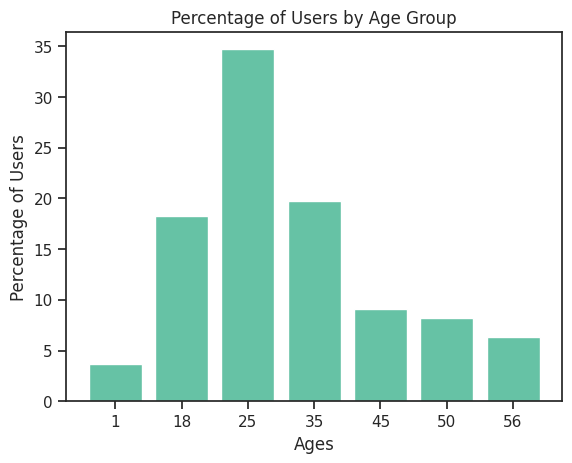


The movie with the most ratings is 'American Beauty (1999)' (ID: 2858) with 3428 ratings.
rating
1      83
2     134
3     358
4     890
5    1963
Name: count, dtype: int64


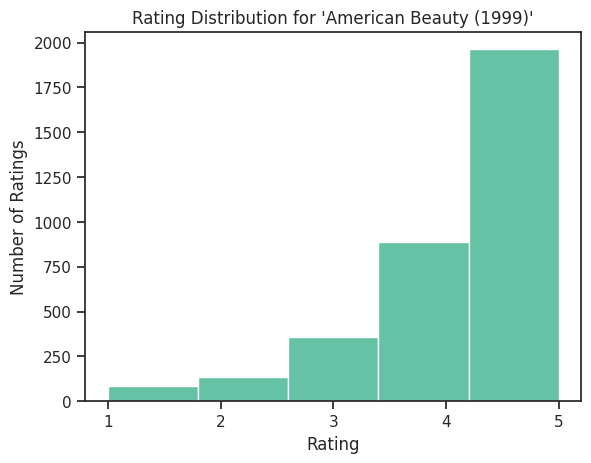


The average rating across all users and movies is 3.58


In [86]:
# What is the occupation that maps to most of the users? Plot a histogram of the occupation counts and report the size of the largest bin.
# Count the amount of users with the occupation and display the occupation with the most users
occupationCounts = users['occupation'].value_counts()
print(f"Occupation {occupationCounts.idxmax()} has the most users: {occupationCounts.max()}")

# Plot histogram
plt.hist(users['occupation'], bins=len(users['occupation'].unique()))
plt.title("User Counts by Occupation")
plt.xlabel("Number of Users")
plt.ylabel("Occupation")
plt.xticks(range(min(users['occupation']), max(users['occupation']) + 1))
plt.show()

# Display the largest bin size amount
print(f"The largest bin size is {occupationCounts.max()} users.")


print()
# What percentage of users are 50 years old or older? Plot a bar graph showing all percentages (per age group) and report the requested value.
# Count total users
totalUsers = users.shape[0]

# Count users aged 50 or older
users50plus = users[users['age'] >= 50].shape[0]

# Calculate and display percentage
percent50plus = (users50plus / totalUsers) * 100
print(f"Percentage of users aged 50 or older: {percent50plus:.2f}%")

# Percentage per age group
ageCounts = users['age'].value_counts().sort_index()
agePercent = (ageCounts / totalUsers) * 100

# Plot bar graph
plt.bar(agePercent.index.astype(str), agePercent.values)
plt.title("Percentage of Users by Age Group")
plt.xlabel("Ages")
plt.ylabel("Percentage of Users")
plt.show()


print()
# Which movie received the highest number of ratings (and how were such ratings distributed)?
# Count how many ratings each movie received
ratingCounts = ratings['movie_id'].value_counts()

# Get the movie_id with the most ratings
mostRatedMovieId = ratingCounts.idxmax()
mostRatedCount = ratingCounts.max()

# Get the title of that movie
mostRatedMovieTitle = movies[movies['movie_id'] == mostRatedMovieId]['title'].values[0]

print(f"The movie with the most ratings is '{mostRatedMovieTitle}' (ID: {mostRatedMovieId}) with {mostRatedCount} ratings.")

# Get all the ratings for that movie
ratingsForMovie = ratings[ratings['movie_id'] == mostRatedMovieId]['rating']
print(ratingsForMovie.value_counts().sort_index())

# Plot distribution of ratings for that movie
plt.hist(ratingsForMovie, bins=5)
plt.title(f"Rating Distribution for '{mostRatedMovieTitle}'")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

print()
# What is the average rating for all movies/users?
averageRating = ratings['rating'].mean()
print(f"The average rating across all users and movies is {averageRating:.2f}")


-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [87]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [88]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### 1.3 - Your turn! (8 points, i.e., 4 pts each)

Modify the Python code to:
9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

### Solution

In [94]:
# Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
# Build pivot table: average rating by title and gender
meanRatings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratingsByTitle = data.groupby('title').size()

# Select only movies with 250 ratings or more
activeTitles = ratingsByTitle.index[ratingsByTitle >= 250]

# Select rows on the index
meanRatings = meanRatings.loc[activeTitles]

# Sort by male ratings
topMaleRatings = meanRatings.sort_values(by='M', ascending=False)

# Display top 10
topMaleRatings[:10]


# Display the top 10 favorite movies among young viewers (17 years old or younger),
# selecting only movies with 300 ratings or more.

# Build pivot table: average rating by title and age
meanRatings = data.pivot_table('rating', index='title',
                                columns='age', aggfunc='mean')

# Group ratings by title
ratingsByTitle = data.groupby('title').size()

# Select only movies with 300 ratings or more
activeTitles = ratingsByTitle.index[ratingsByTitle >= 300]

# Select rows on the index
meanRatings = meanRatings.loc[activeTitles]

# Sort by ratings from users age 17 or younger
topYoungRatings = meanRatings.sort_values(by=1, ascending=False)

# Display top 10
topYoungRatings[:10]


age,1,18,25,35,45,50,56
title,,,,,,,
Metropolis (1926),4.888889,3.872340,4.079470,4.032967,4.119048,4.218750,4.187500
GoodFellas (1990),4.840000,4.457912,4.355714,4.154321,3.929134,4.084746,3.984848
"Third Man, The (1949)",4.818182,4.346939,4.402516,4.475248,4.431818,4.531250,4.500000
Double Indemnity (1944),4.777778,4.372881,4.471338,4.363057,4.460317,4.507937,4.186047
"Piano, The (1993)",4.750000,3.408451,3.696000,3.681818,3.666667,3.642857,3.920000
Fried Green Tomatoes (1991),4.750000,3.734513,3.687783,3.844828,3.879310,4.018868,4.178571
Raging Bull (1980),4.714286,4.439560,4.190114,4.148387,3.903226,4.033898,4.242424
Roman Holiday (1953),4.687500,4.290909,4.248175,4.136842,4.000000,4.146341,4.400000
Citizen Kane (1941),4.680000,4.392405,4.365854,4.400000,4.339130,4.468750,4.333333


### BONUS! (up to 4 points)

Write Python code to display the most divisive movies (selecting only movies with 250 ratings or more), i.e.:
- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

Hint/Convention: ``mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']``

### Solution

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

### BONUS! (up to 2 points)

Write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification.

Hint: Disagreement can be measured by the _variance_ or _standard deviation_ of the ratings.

### Solution

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

### BONUS! (up to 2 points)

Write Python code to answer the question:
What is the most popular movie genre?
Plot a histogram of the genre counts and report the size of the largest bin.

Hint: use the original **movies** data frame, _before_ the merge!

### Solution

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

------------
## Part 2: Titanic (26 pts + 6 bonus pts)

In this part we'll use the dataset of passengers on the *Titanic*, available through the Seaborn library.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 2.1 - Your turn! (8 points, i.e., 2 pts each)

Look at the Python code below and answer the following questions (expressing the amounts in % terms):

11. How many female passengers did not survive (regardless of their class)?
12. How many first class female passengers did not survive?
13. How many male passengers did not survive (regardless of their class)?
14. How many third class male passengers did not survive?

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

<ipython-input-19-0ab51900a79c>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', margins=True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


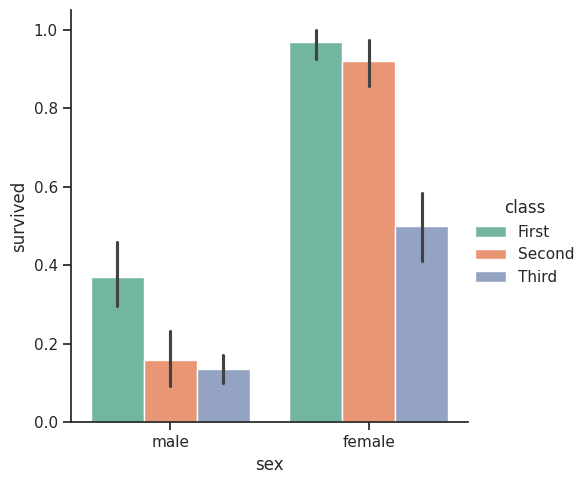

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

### Solution

(ENTER YOUR ANSWER HERE)

### 2.2 - Your turn! (18 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

15. How many passengers (absolute number) were there per deck/class?

(**Hint**: The plot below shows how decks and classes were related and provides a visual estimate.)
16. How many passengers (absolute number) in Deck A survived?
17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?


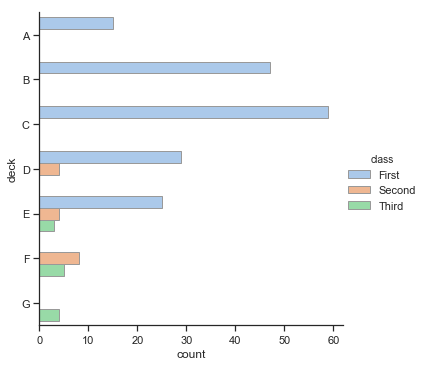

### Solution

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

### BONUS! (up to 6 points)

Write Python code to answer the following questions (using percentage values for the first two questions):
- How many women traveling alone did not survive?
- How many men 35 years old or younger did not survive?
- What was the average fare per class?

### Solution

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

------------
## Part 3: US Baby Names 1880–2018 (34 pts + 6 bonus pts)

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. These plain text data files, one per year, contain the total number of births for each sex/name combination. The raw archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

After downloading the 'National data' file _names.zip_ and unzipping it, you will have a directory containing a series of files like _yob1880.txt_ through _yob2018.txt_. We need to do some data wrangling to load this dataset (see code below).

In [95]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2


In [96]:
r = urllib2.urlopen("https://github.com/PBSC-Hammond/CAP2751/raw/main/names.zip").read()
file = ZipFile(BytesIO(r))

years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    file_path = file.open(path)
    frame = pd.read_csv(file_path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [97]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


### 3.1 - Your turn! (20 points)

Write Python code to compute the number of baby boys and baby girls born each year and display the two line plots over time.

Hint: Start by aggregating the data at the year and sex level using ``groupby`` or ``pivot_table``.

Your plot should look like this:


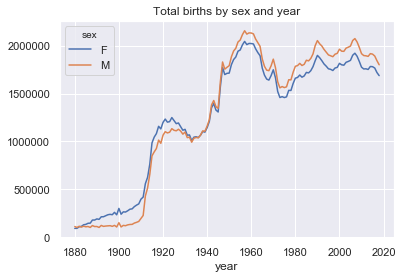

### Solution

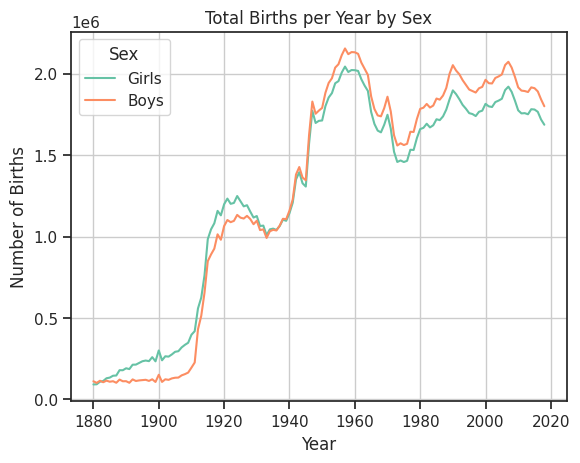

In [101]:
# Group data by year and sex, then sum the number of births
totalBirths = names.groupby(['year', 'sex'])['births'].sum()

# Reshape the data so sex becomes columns m and f
birthsByYear = totalBirths.unstack()

# Plot the data
birthsByYear.plot(title="Total Births per Year by Sex")
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.legend(title="Sex", labels=["Girls", "Boys"])
plt.grid(True)
plt.show()


-------------
### Analyzing Naming Trends

Suppose we're interested in analyzing the Top 1000 most popular baby names per year.

We will do so by following these steps:
1. Insert a column _prop_ with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name in a given year.
2. Group the data by year and sex, then add the new column to each group.
3. Extract a subset of the data (the top 1,000 names for each sex/year combination). This is yet another group operation.
4. Split the Top 1,000 names into the boy and girl portions.
5. Build a pivot table of the total number of births by year and name.

Finally, we will plot the percentage of babies named 'John', 'Noah', 'Madison', or 'Lorraine' over time.

In [102]:
names = names.reset_index(drop=True)

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

/tmp/ipython-input-102-110338985.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year', 'sex']).apply(add_prop)


In [103]:
names

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2018 M   1957041      Zylas   M       5  2018  0.000003
         1957042      Zyran   M       5  2018  0.000003
         1957043      Zyrie   M       5  2018  0.000003
         1957044      Zyron   M       5  2018  0.000003
         1957045      Zzyzx   M       5  2018  0.000003

[1957046 rows x 5 columns]

In [105]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names = names.reset_index(drop=True) # Reset the index to avoid ambiguity
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

/tmp/ipython-input-105-2155722433.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year', 'sex']).apply(add_prop)


In [106]:
names = names.reset_index(drop=True)
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

/tmp/ipython-input-106-2989524609.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


In [107]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Davian,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [108]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [109]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

/tmp/ipython-input-109-1237453490.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table('births', index='year',


In [110]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 1880 to 2018
Columns: 7153 entries, Aaden to Zyaire
dtypes: float64(7153)
memory usage: 7.6 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

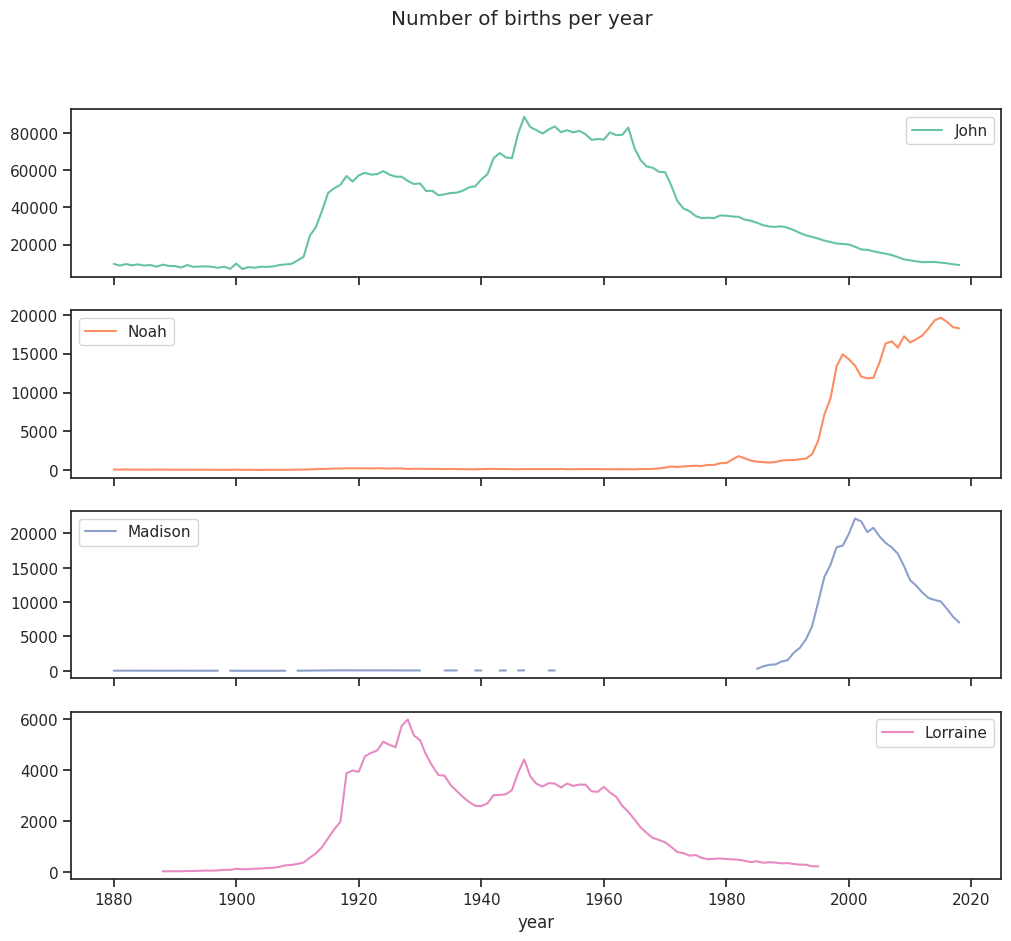

In [111]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

--------------
### BONUS! (up to 6 points)

Write Python code to test the hypothesis:

There has been an increase in naming diversity over time.

Hint: Compute a metric that consists of the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births, and plot that metric over time.

Your plot should look like this:

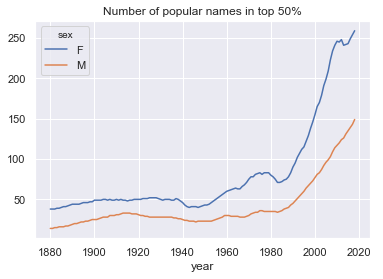

### Solution

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

-------------
### Boy names that became girl names (and vice versa)

Next, let's look at baby names that were more popular with one sex earlier in the sample but have switched to the opposite sex over the years. One example is the name Lesley or Leslie (or other possible, less common, spelling variations).

We will do so by following these steps:
1. Go back to the top1000 DataFrame and compute a list of names occurring in the dataset starting with “lesl”.
2. Filter down to just those names and sum births grouped by name to see the relative frequencies.
3. Aggregate by sex and year and normalize within year.
4. Plot the breakdown by sex over time.

In [112]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

,0
645,Leslie
2325,Lesley
4238,Leslee
4707,Lesli
6083,Lesly


In [113]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

,births
name,
Leslee,993
Lesley,35021
Lesli,929
Leslie,378168
Lesly,11433


In [114]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

<Axes: xlabel='year'>

<Figure size 640x480 with 0 Axes>

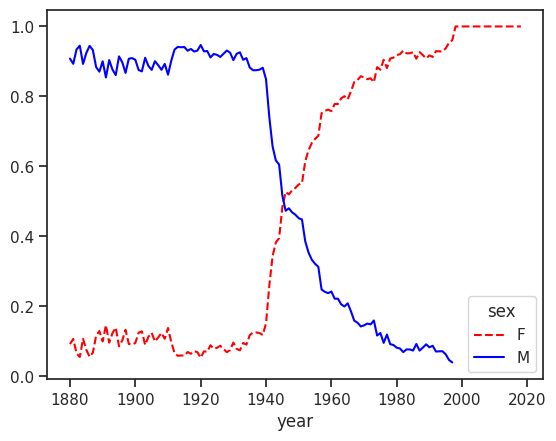

In [115]:


fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

---------------------

Now it's time for you to come up with a different hypothesis. **Be creative!**

Example: The name 'Reese' has been more prevalent among baby girls than baby boys since 2000.

### 3.2 - Your turn! (14 points)

Write Python code to test your hypothesis (and some text to explain whether it was confirmed or not).

### Solution

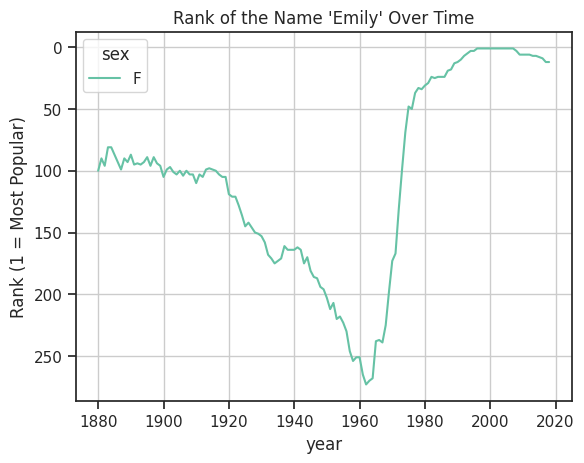

In [118]:
# Hypothesis: The name Emily has remained popular in the top 10 consistently over time.
# Step 1: Assign rank to all names in top1000
top1000['rank'] = top1000.groupby(['year', 'sex'])['births'].rank(ascending=False, method='first')

# Step 2: Filter for just Emily
emilyRank = top1000[top1000['name'] == 'Emily']

# Step 3: Plot the rank over time
emilyRank.pivot_table(index='year', columns='sex', values='rank').plot(
    title="Rank of the Name 'Emily' Over Time")
plt.ylabel("Rank (1 = Most Popular)")
plt.gca().invert_yaxis()  # Show rank 1 at the top
plt.grid(True)
plt.show()


Hypothesis: The name Emily has remained popular in the top 10 consistently over time.

- According to the graph, my hypothesis was incorrect. The name Emily did not remain consistently in the top 10 over time. It dropped to much lower ranks around the 1960s, then made a sharp increase staying in the top 10 starting in the 2000s.

## Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

What have you learned from this assignment?
- I have learned a lot from this assignment, especially by slowing down and taking the time to understand each line of code. I learned how to use more useful functions. I also got more comfortable with using Pandas and Matplotlib. This assignment helped me realize data science is powerful.

Which parts were the most fun, time-consuming, enlightening, tedious?
- The most fun parts were being able to use real-world data and manipulating in a way you can understand it. Like being able to see your own age groups top rated movies, seeing when your name was the most popular. It was also the most time-consuming, searching and understanding the different functions to properly use. The graphs were tedious but visually enlightening.

What would you do if you had an additional week to work on this?
- If i had an additional week to work on this, I would spend more time practicing graphs and getting more creative with them.
